In [15]:
from utils.utilities import get_engine
import pandas as pd
from analysis.modules.efficient_frontier import ef_random_portfolio

In [2]:
engine = get_engine(country = 'AU')

In [21]:
small_cap_query = f"""
    SELECT
        company_name,
        fundamental->>'industry' AS industry,
        stock_code,
        fundamental->>'marketCap' AS market_cap,
        fundamental->>'priceToBook' AS pb_ratio,
        fundamental->>'debtToEquity' AS de_ratio
    FROM stock_info
    WHERE
        CAST(fundamental->>'marketCap' AS FLOAT) >= 100000000
        AND
        CAST(fundamental->>'marketCap' AS FLOAT) < 2000000000
        AND
        CAST(fundamental->>'priceToBook' AS FLOAT) >= 0.3
        AND
        CAST(fundamental->>'priceToBook' AS FLOAT) < 1
        AND
        CAST(fundamental->>'debtToEquity' AS FLOAT) < 1.1

"""
df = pd.read_sql_query(small_cap_query, engine)
df

,company_name,industry,stock_code,market_cap,pb_ratio,de_ratio
0,Ardent Leisure Ltd,Leisure,ALG,218266272,0.83804137,0.236
1,Jupiter Mines Ltd,Other Industrial Metals & Mining,JMS,342914240,0.7383966,0.107
2,Pacific Current Group Ltd,Asset Management,PAC,448175424,0.8796437,0.554
3,Lake Resources NL,Other Industrial Metals & Mining,LKE,156759904,0.9166667,0.949
4,Bathurst Resources Limited,Coking Coal,BRL,184662400,0.65512556,0.454
5,Carlton Investments Ltd,Asset Management,CIN,795564736,0.9633263,0.02
6,Delta Lithium Ltd,Gold,DLI,220545792,0.92537314,0.067
7,Grange Resources Limited,Other Industrial Metals & Mining,GRR,509229600,0.5352798,0.524
8,Hot Chili Ltd,Copper,HCH,118250552,0.5816686,0.15
9,Pointsbet Holdings Ltd,Gambling,PBH,254576416,0.49295774,0.716


Query data


Convert data to close format
Begin calculation


/home/khoa/anaconda3/envs/stock/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/home/khoa/anaconda3/envs/stock/lib/python3.8/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


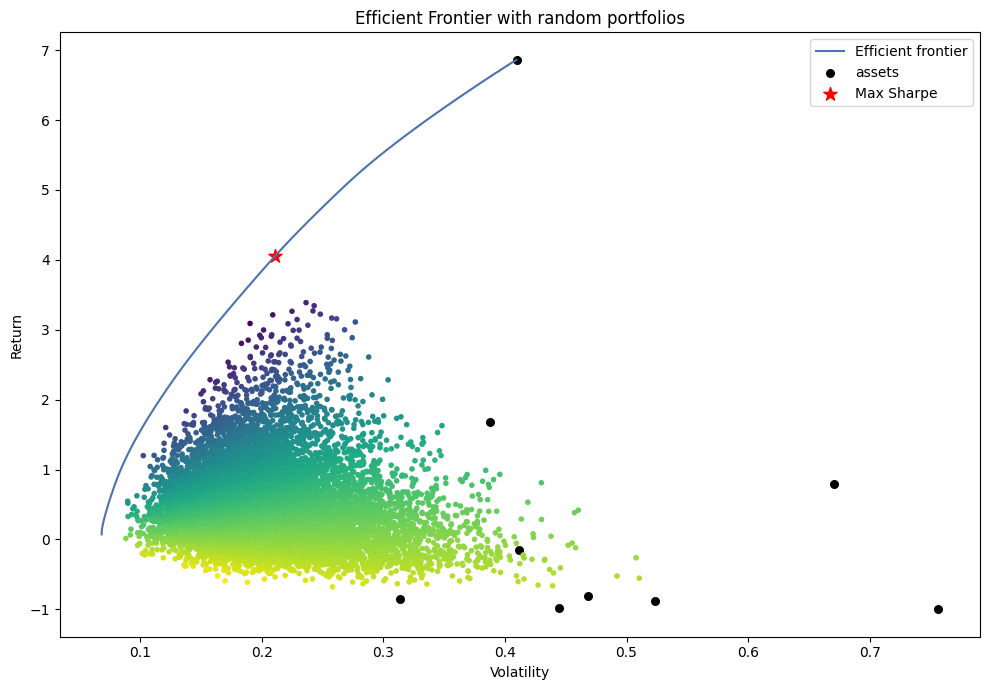

{'JMS': 0.19911675625377606,
 'CIN': 0.21565192119647467,
 'GRR': 0.07024177660909611,
 'TBR': 0.5149895459406533}

In [29]:
result = ef_random_portfolio(df['stock_code'], days = 30*1)
result = {k : result[k] for k in result if result[k] > 0}
result

In [ ]:
fibonacci_retracement_strategy(list(result.keys()), days = 365 * 2)

In [ ]:
FEE = 5.0
LARGE_FEE = 10.0
TOTAL = 3000
PURCHASE_PRICE = {
    'SYI' : 28.1594,
    'NEC' : 1.93,
    'IFT' : 9.4,
}